# Projeto de Redes Sociais

Cicero Tiago Carneiro Valentim

Lais Nascimento da Silva

Thalia Loiola da Silva

William Augusto Reis da Silva

### Bibliotecas

In [1]:
from graph_tool import centrality, clustering, PropertyMap
from graph_tool import Graph
# from graph_tool.all import graph_draw
from netpixi.data.gt import *
from netpixi import render, peek
import netpixi
import pandas as pd
import netpixi
import numpy as np

Às vezes é necessário instalar o openpyxl. Só descomentar:

In [3]:
# !pip install openpyxl

## Carregamento do grafo

In [6]:
grafo_titulo = load_gt('gr_titulo.net.gz')
m = draw_gt.sfdp_layout(grafo_titulo)
move_gt(grafo_titulo, m)
save_gt(grafo_titulo, 'exemplo2.net.gz')
r = netpixi.render('exemplo2.net.gz', infinite=True);

In [7]:
from graph_tool import centrality, clustering

# calculo clustering coefficient
c = clustering.local_clustering(grafo_titulo)

# calculo betweenness
bc, _ = centrality.betweenness(grafo_titulo)

grafo_titulo.vp['betweenness'] = bc
grafo_titulo.vp['clustering'] = c

In [23]:
df = pd.DataFrame({k: list(v) for k, v in grafo_titulo.vp.items()})

In [25]:
filmes = pd.read_excel('netflix.xlsx')

In [26]:
df.sort_values(by='betweenness')

,id,nome,_x,_y,betweenness,clustering
0,0,The Closet,-32.504764,-78.421429,0.000000,0.000000
639,639,Sympathy for Mr. Vengeance,-183.767704,49.759114,0.000000,0.000000
641,641,Rang De Basanti,-141.756576,98.631853,0.000000,0.000000
643,643,As It Is in Heaven,34.975907,64.449967,0.000000,1.000000
645,645,Lady Vengeance,-165.586443,-74.546777,0.000000,0.000000
...,...,...,...,...,...,...
425,425,Lupin the 3rd: The Columbus Files,21.078999,29.015980,0.004244,0.283502
447,447,The Girl Who Leapt Through Time,31.626656,31.598067,0.004794,0.405614
365,365,Robin-B-Hood,26.802024,17.409868,0.009172,0.260443
378,378,Gantz,15.149500,23.524071,0.018182,0.169083


In [27]:
filmes.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [28]:
filmes_score = filmes[['IMDb Score', 'Title']].rename(columns={"Title":"nome"})

In [29]:
filmes_score.nome = filmes_score.nome.astype(str, copy=False)
df.nome = df.nome.astype(str, copy=False)
df.id = df.id.astype(int, copy=False)

Remoção de filmes duplicados

In [30]:
filmes_score = filmes_score.drop_duplicates(subset=['nome'], keep=False)

Adição da coluna `IMDb Score` ao datafram `df`

In [31]:
df

,id,nome,_x,_y,betweenness,clustering
0,0,The Closet,-32.504764,-78.421429,0.000000,0.000000
1,1,Sway,-139.345292,-40.616426,0.000000,0.000000
2,2,The Return,115.520018,63.389219,0.000000,0.000000
3,3,Intimate Strangers,25.130260,-86.897549,0.000000,0.000000
4,4,Overcoming,177.824175,75.367236,0.000000,0.000000
...,...,...,...,...,...,...
1011,1011,Spy Kids 2: The Island of Lost Dreams,32.016217,26.970615,0.000035,0.874459
1012,1012,InuYasha: The Movie 2: The Castle Beyond the L...,18.774371,46.508032,0.000000,1.000000
1013,1013,Two and a Half Men,-164.406511,109.924191,0.000000,0.000000
1014,1014,50 First Dates,-144.072449,-0.548820,0.000000,0.000000


In [32]:
df = df.set_index('nome').join(filmes_score.set_index('nome'), how='left').reset_index()

In [33]:
df.nome.describe()

count           1016
unique          1016
top       The Closet
freq               1
Name: nome, dtype: object

In [34]:
df.head()

,nome,id,_x,_y,betweenness,clustering,IMDb Score
0,The Closet,0,-32.504764,-78.421429,0.0,0.0,7.0
1,Sway,1,-139.345292,-40.616426,0.0,0.0,7.2
2,The Return,2,115.520018,63.389219,0.0,0.0,8.0
3,Intimate Strangers,3,25.130260,-86.897549,0.0,0.0,7.0
4,Overcoming,4,177.824175,75.367236,0.0,0.0,6.9


In [36]:
df = df.rename(columns={"IMDb Score": 'desempenho'})

In [37]:
df.head()

,nome,id,_x,_y,betweenness,clustering,desempenho
0,The Closet,0,-32.504764,-78.421429,0.0,0.0,7.0
1,Sway,1,-139.345292,-40.616426,0.0,0.0,7.2
2,The Return,2,115.520018,63.389219,0.0,0.0,8.0
3,Intimate Strangers,3,25.130260,-86.897549,0.0,0.0,7.0
4,Overcoming,4,177.824175,75.367236,0.0,0.0,6.9


In [38]:
import seaborn as sns
sns.set()

In [39]:
import statsmodels.formula.api as smf

### Agrupamento

<AxesSubplot:xlabel='betweenness', ylabel='desempenho'>

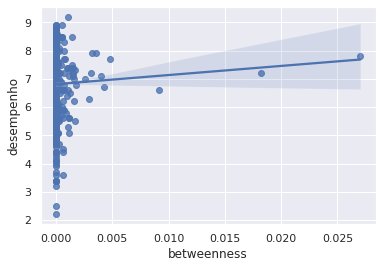

In [40]:
sns.regplot(x=df['betweenness'], y=df['desempenho'])

In [41]:
model = smf.ols(data=df, formula='desempenho ~ betweenness')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.385
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.239
Time:                        02:32:46   Log-Likelihood:                -1367.0
No. Observations:                 975   AIC:                             2738.
Df Residuals:                     973   BIC:                             2748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8122      0.032    214.493      0.000       6.750       6.874
betweenness    32.3159     27.456      1.177      0.239     -21.564      86.196
==============================================================================
Omnibus:                       91.167   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.384
Skew:                          -0.688   Prob(JB):                     2.42e-30
Kurtosis:                       4.210   Cond. No.                         871.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como esperado após a análise dos gráficos, o R² é bem pequeno quando queremos explicar o desempenho levando em conta o __betweenness__. Além disso, podemos ver que o coeficiente é positivo, indicando que existe uma relação positiva, no entanto, o _p\_valor_ é muito grande, ou seja, não podemos rejeitar a hipótese nula de que não há relação.

### Diversidade

<AxesSubplot:xlabel='clustering', ylabel='desempenho'>

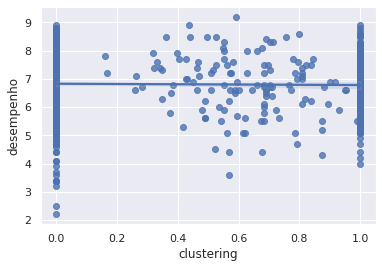

In [42]:
sns.regplot(x=df['clustering'], y=df['desempenho'])

In [43]:
model = smf.ols(data=df, formula='desempenho ~ clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3622
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.547
Time:                        02:32:48   Log-Likelihood:                -1367.6
No. Observations:                 975   AIC:                             2739.
Df Residuals:                     973   BIC:                             2749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8284      0.037    184.166      0.000       6.756       6.901
clustering    -0.0476      0.079     -0.602      0.547      -0.203       0.108
==============================================================================
Omnibus:                       91.951   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.526
Skew:                          -0.690   Prob(JB):                     8.31e-31
Kurtosis:                       4.228   Cond. No.                         2.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² é desprezível quando queremos explicar o __desempenho__ levando em conta o __clustering__. Além disso, podemos ver que o coeficiente é negativo, indicando que existe uma relação negativa, no entanto, o _p\_valor_ é muito grande, ou seja, também não podemos rejeitar a hipótese nula de que não há relação.

Após analisarmos individualmente a contribuição de cada variável, decidimos testar o impacto da combinação das duas no desempenho do filme.

In [44]:
model = smf.ols(data=df, formula='desempenho ~ betweenness + clustering')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             desempenho   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9002
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.407
Time:                        02:32:48   Log-Likelihood:                -1366.8
No. Observations:                 975   AIC:                             2740.
Df Residuals:                     972   BIC:                             2754.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8247      0.037    183.437      0.000       6.752       6.898
betweenness    32.9567     27.482      1.199      0.231     -20.975      86.888
clustering     -0.0510      0.079     -0.645      0.519      -0.206       0.104
==============================================================================
Omnibus:                       91.454   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.953
Skew:                          -0.686   Prob(JB):                     1.11e-30
Kurtosis:                       4.230   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pelo que se pode observar, a contribuição da combinação das variáveis não parece ser suficiente para explicar o desempenho de um filme. A combinação dos coeficientes com seus respectivos _p\_valores_ continua ruim, no entanto, podemos ver uma melhoria ínfima no R².

Portanto, dado que a hipótese era que, de alguma forma, o __agrupamento__ e a __diversidade__ explicavam o __desempenho__, pode-se dizer que a hipótese não se comprova estatisticamente ou que precisaríamos de um refinamento melhor no modelo.